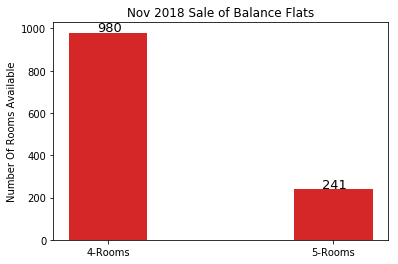

In [4]:
# Plot overall proportion of 4-Room and 5-Room for sale in SBF Nov 2018
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import parseUnitDetails
os.getcwd()
# To get a boxplot to see the number of 4-Rooms flats available for Nov 2018 Sale of balance flats

unitDetails=parseUnitDetails.getUnitDetails() # if () means it takes the default kwargs*

numberOf4Room=0
for i in range(len(unitDetails['rmType'])):
    if unitDetails['rmType'][i]=='4-Room':
        numberOf4Room = numberOf4Room+1
numberOf5Room=0
for j in range(len(unitDetails['rmType'])):
    if unitDetails['rmType'][j]=='5-Room':
        numberOf5Room = numberOf5Room+1

# values
numberOfRooms =[numberOf4Room,numberOf5Room]



width = 0.35
#print(unitDetails['rmType'])
fig = plt.gcf()  #get current figure
ax = plt.gca()
p1t = plt.bar([0,1],numberOfRooms, width, color='#d62728')
plt.ylabel('Number Of Rooms Available')
plt.title('Nov 2018 Sale of Balance Flats')
plt.xticks([0,1], ('4-Rooms', '5-Rooms'))


# Putting bar labels
for i in range(0,2):
    ax.text(x = i-0.05 , y = numberOfRooms[i]+ 5 , s = numberOfRooms[i],
            size = 13, color= 'black')

plt.show()




['Geylang', 'Toa Payoh', 'Kallang / Whampoa', 'Clementi', 'Bedok', 'Serangoon', 'Ang Mo Kio', 'Bukit Merah', 'Queenstown', 'Bishan', 'Pasir Ris', 'Tampines', 'Sembawang', 'Yishun', 'Bukit Batok', 'Bukit Panjang', 'Sengkang', 'Choa Chu Kang', 'Hougang', 'Woodlands', 'Punggol', 'Jurong East', 'Jurong West']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


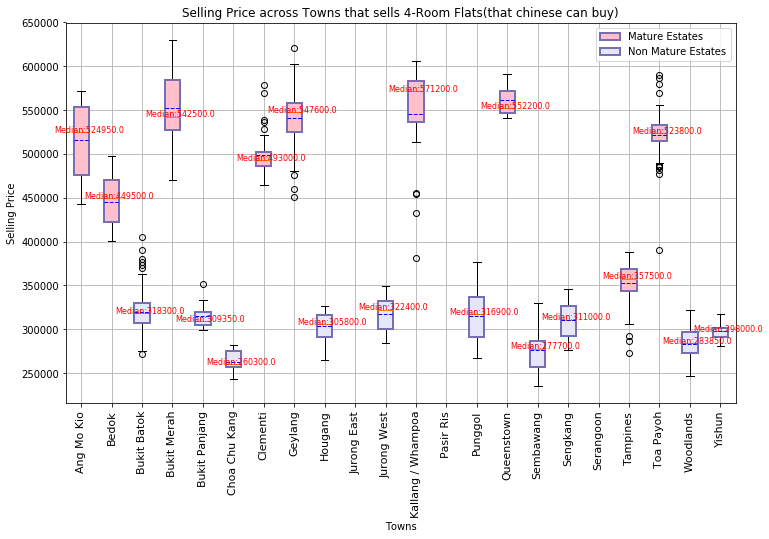

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import parseUnitDetails
os.getcwd()
# TO get a boxplot to see the number of 4-Rooms flats available for Nov 2018 Sale of balance flats
# not repurchased flats and lease not less than 60 years

unitDetails = parseUnitDetails.getUnitDetails()



# Labels of the 22 towns in alphabetical order
labels = np.array(['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun'])


# list of townnames
allTowns = ['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun']

output = []
for town in allTowns:
    townPrice = []
    #print('top', town)
    for unit in unitDetails:
        if unit['rmType']=='4-Room':
            if unit['repurchasedFlat']=='':
                if unit['leaseLessThan60Yrs']=='':
                    if unit['town']==town:
                        townPrice1 = unit['sellingPrice'] 
                        townPrice.append(townPrice1)
    output.append(townPrice)

########################################################

## Mature and Non Mature estates
estatesMaturity  = np.genfromtxt("Number of Applications Received for 3-room and bigger flats as at 19 Nov 2018.csv", delimiter=",",skip_header=1,
                dtype=[('town','U24'),('FlatType','U50'),('No_of_Units','i8'),('Number_of_applicants','i8'),
                      ('Rate_Non_Elderly_First_timers','f8'),('Rate_Non_Elderly_Second_timers','f8'),
                      ('Rate_Non_Elderly_Overall','f8'),('Mature_Estates','U8')],
                missing_values=['na','-','','NA'],filling_values=0)

estatesMaturityTown= estatesMaturity['town']
estatesMaturityMature= estatesMaturity['Mature_Estates']



estatesMaturityCon= zip(estatesMaturityTown,estatesMaturityMature)

# make unique sets of 'towns' and 'Mature Estates'
estatesMaturityCon =set(estatesMaturityCon)


# Mature and Non Mature estates
nMature = []
yMature = []


for town in estatesMaturityCon:
    if town[1]=='N':
        nMature.append(town[0])
    elif town[1]=='Y':
        yMature.append(town[0])
nMature.append('Jurong East')
nMature.append('Jurong West')
nMature.remove('Jurong East / West')
#print("Mature estates : \n{}".format(yMature))
#print("Non Mature estates : \n{}".format(nMature))


    
# to label which is mature which is non mature estate
Mature = []
for repeatMature in range(len(yMature)):
    Mature.append('Mature')


NonMature = []
for repeatMature in range(len(yMature)):
    NonMature.append('Non Mature')





## Making labels in order
label = yMature + nMature
print(label)

# Make different colour for Mature and Non Mature estates  
values= Mature + NonMature
keys = label




# Create a figure instance
fig = plt.figure(1, figsize=(12, 7))
plt.title('Selling Price across Towns that sells 4-Room Flats(that chinese can buy)')
plt.xlabel('Towns')
plt.ylabel('Selling Price')

# Create an axes instance
ax = fig.add_subplot(111)


# Create the boxplot
#bp = ax.boxplot(dataSubset)
    
# Adding colors to my boxplot
bp = ax.boxplot(output, patch_artist=True,labels= labels,meanprops = dict(color='blue'),showmeans=True, meanline=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    #change outline color
    box.set( color='#7570b3', linewidth=2)
    
    # change fill color
    region_color_dict = {
    "Mature": "pink",
    "Non Mature": "lavender",      
}

town_region_dict= dict(zip(keys,values))  #### dict used this way diff
#print('town_region_dict', town_region_dict)
#print('region_color_dict', region_color_dict)
for label, box in zip(labels, bp["boxes"]):
    box.set_facecolor(region_color_dict[town_region_dict[label]])  #set face color to change color of boxes.

    
#bp=ax.boxplot(output)
plt.xticks(fontsize=11,rotation='vertical')

# Write the median value above the median line
for line in bp['medians']:
    #print(line)
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    #print(x,y)
    if np.isnan(y)==True:
        #print("hello")
        continue
        #skip the loop
    # overlay median value
    
    plt.text(x, y, 'Median:{:.1f}'.format(y),
         horizontalalignment='center',fontsize=8,color='red') # draw above, centered

    

#gridline
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.legend([bp["boxes"][0], bp["boxes"][2]], ['Mature Estates', 'Non Mature Estates'], loc='upper right')




plt.show()

        
        










C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


town_region_dict {'Geylang': 'Mature', 'Toa Payoh': 'Mature', 'Kallang / Whampoa': 'Mature', 'Clementi': 'Mature', 'Bedok': 'Mature', 'Serangoon': 'Mature', 'Ang Mo Kio': 'Mature', 'Bukit Merah': 'Mature', 'Queenstown': 'Mature', 'Bishan': 'Mature', 'Pasir Ris': 'Mature', 'Tampines': 'Mature', 'Sembawang': 'Non Mature', 'Yishun': 'Non Mature', 'Bukit Batok': 'Non Mature', 'Bukit Panjang': 'Non Mature', 'Sengkang': 'Non Mature', 'Choa Chu Kang': 'Non Mature', 'Hougang': 'Non Mature', 'Woodlands': 'Non Mature', 'Punggol': 'Non Mature', 'Jurong East': 'Non Mature', 'Jurong West': 'Non Mature'}
region_color_dict {'Mature': 'pink', 'Non Mature': 'lavender'}


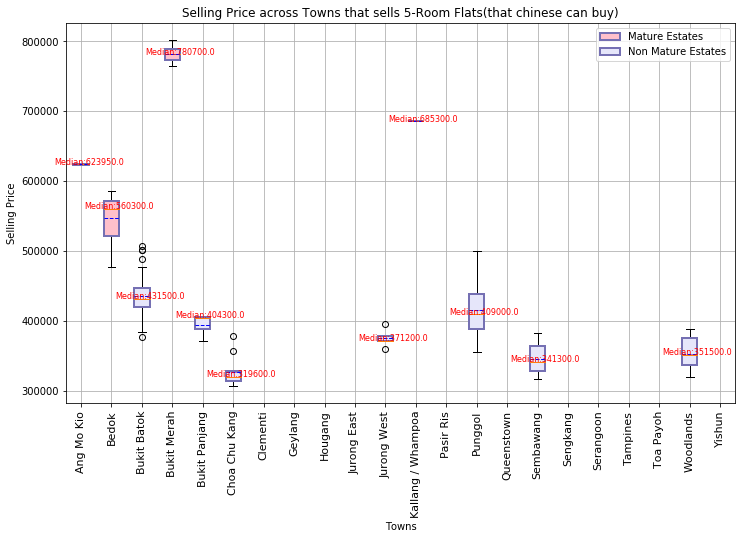

In [3]:
# Boxplot for selling price over town for 5 Rooms SBF Nov 2018
# not repurchased flats and lease not less than 60 years
output = []
for town in allTowns:
    townPrice = []
    #print('top', town)
    for unit in unitDetails:
        if unit['rmType']=='5-Room':
            if unit['repurchasedFlat']=='':
                if unit['leaseLessThan60Yrs']=='':
                    if unit['town']==town:
                        townPrice1 = unit['sellingPrice'] 
                        townPrice.append(townPrice1)
    output.append(townPrice)





################################################################################################################

# Create a figure instance
fig = plt.figure(1, figsize=(12, 7))
plt.title('Selling Price across Towns that sells 5-Room Flats(that chinese can buy)')
plt.xlabel('Towns')
plt.ylabel('Selling Price')

# Create an axes instance
ax = fig.add_subplot(111)


# Create the boxplot
#bp = ax.boxplot(dataSubset)
    
# Adding colors to my boxplot
bp = ax.boxplot(output, patch_artist=True,labels= labels,meanprops = dict(color='blue'),showmeans=True, meanline=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    #change outline color
    box.set( color='#7570b3', linewidth=2)
    
    # change fill color
    region_color_dict = {
    "Mature": "pink",
    "Non Mature": "lavender",      
}

town_region_dict= dict(zip(keys,values))  #### dict used this way diff
print('town_region_dict', town_region_dict)
print('region_color_dict', region_color_dict)
for label, box in zip(labels, bp["boxes"]):
    box.set_facecolor(region_color_dict[town_region_dict[label]])  #set face color to change color of boxes.

    
#bp=ax.boxplot(output)
plt.xticks(fontsize=11,rotation='vertical')


for line in bp['medians']:
    #print(line)
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    #print(x,y)
    if np.isnan(y)==True:
        continue
        #skip the loop
    # overlay median value
    plt.text(x, y, 'Median:{:.1f}'.format(y),
         horizontalalignment='center',fontsize=8,color='red') # draw above, centered

    
#gridline
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.legend([bp["boxes"][0], bp["boxes"][2]], ['Mature Estates', 'Non Mature Estates'], loc='upper right')




plt.show()

        
        